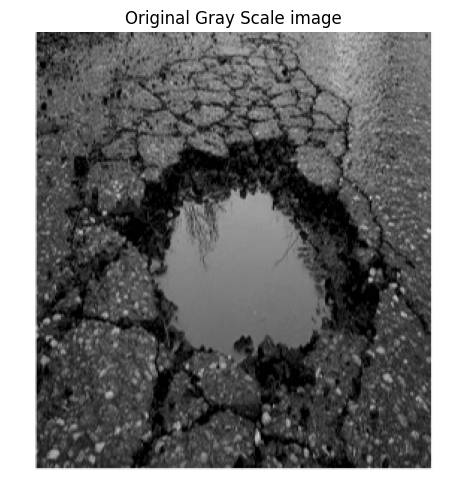

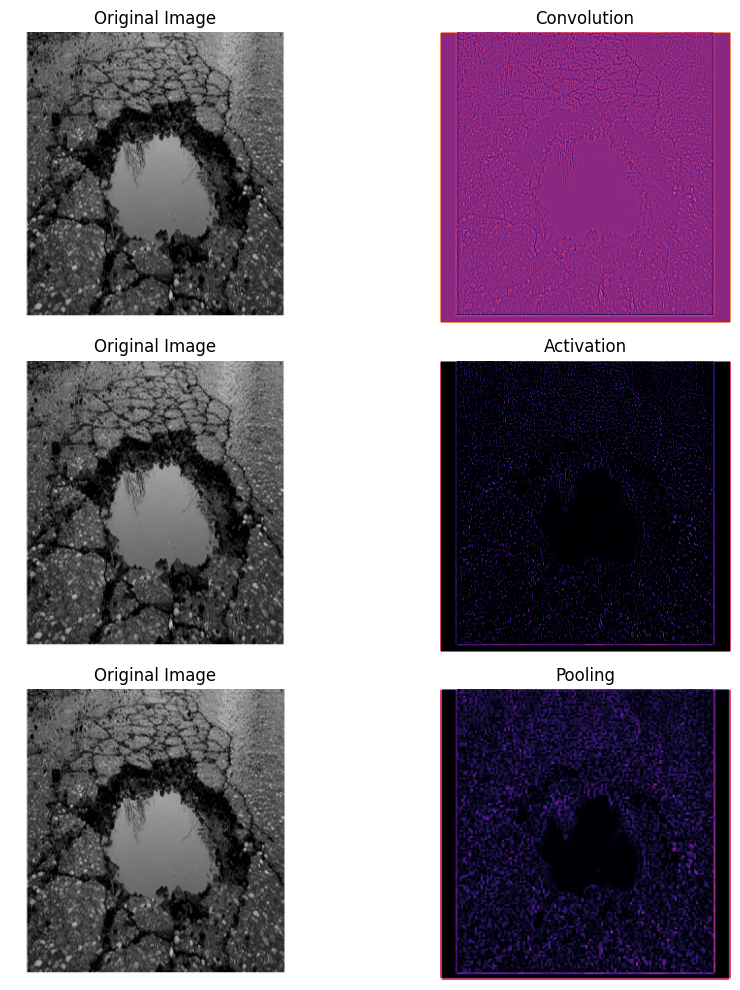

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the plotting configurations
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel for convolution
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])

# Read and process the image
image = tf.io.read_file('Pothole2.png')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# Convert the image to numpy array and display original grayscale image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

# Prepare the image for convolution
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

# Prepare the kernel
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Perform convolution
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image, filters=kernel, strides=1, padding='SAME')

# Apply activation function (ReLU)
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)

# Apply max pooling
pool = tf.nn.pool
image_condense = pool(input=image_detect, window_shape=(2, 2), pooling_type='MAX', strides=(2, 2), padding='SAME')

# Plot side by side comparisons
plt.figure(figsize=(10, 10))

# Original and Convolution image side by side
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Original and Activation image side by side
plt.subplot(3, 2, 3)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 4)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Original and Pooling image side by side
plt.subplot(3, 2, 5)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 6)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
Here’s a **detailed block-by-block explanation** of the provided code for understanding the workings of CNN components and how the visualization process is implemented:

---

## **1. Import Libraries**

```python
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the plotting configurations
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')
```

- **`numpy`**: For numerical computations.
- **`tensorflow`**: To perform deep learning operations like convolution, activation functions, and pooling.
- **`matplotlib`**: To visualize images at different stages of processing.
- **Plotting Configurations**:
  - `plt.rc`: Configures default styles for plots.
  - `figure.autolayout=True`: Ensures no overlap of titles, axes, etc.
  - `image.cmap='magma'`: Sets the default color map for images.

---

## **2. Define the Kernel**

```python
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])
```

- A **kernel (filter)** is a small matrix applied over the image during convolution to extract features.
- Here, the kernel is designed for **edge detection**:
  - Positive weight (`8`) emphasizes the center pixel.
  - Negative weights (`-1`) suppress surrounding pixels.

---

## **3. Load and Preprocess the Image**

```python
image = tf.io.read_file('Pothole2.png')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])
```

- **`tf.io.read_file`**: Reads the image file in binary format.
- **`tf.io.decode_jpeg`**: Decodes the JPEG image into pixel values.
  - `channels=1`: Converts the image to grayscale.
- **`tf.image.resize`**: Resizes the image to 300x300 pixels to standardize the input size.

---

## **4. Display the Original Image**

```python
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()
```

- **`tf.squeeze`**: Removes extra dimensions (e.g., `[300, 300, 1]` → `[300, 300]`).
- Converts the TensorFlow tensor into a **NumPy array** for visualization.
- **`plt.imshow`**: Displays the grayscale image.

---

## **5. Prepare the Image for Convolution**

```python
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
```

- **`tf.image.convert_image_dtype`**:
  - Converts image pixel values to `float32` in the range `[0, 1]`.
- **`tf.expand_dims`**:
  - Adds a batch dimension to make it compatible with the TensorFlow convolution function.
  - For example, `[300, 300, 1]` → `[1, 300, 300, 1]`.

---

## **6. Prepare the Kernel**

```python
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)
```

- **`tf.reshape`**: Adds input and output channel dimensions to the kernel.
  - For convolution, kernel shape must be `[kernel_height, kernel_width, input_channels, output_channels]`.
  - Here: `[3, 3]` → `[3, 3, 1, 1]`.
- **`tf.cast`**: Ensures the kernel has the same data type (`float32`) as the image.

---

## **7. Perform Convolution**

```python
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image, filters=kernel, strides=1, padding='SAME')
```

- **`tf.nn.conv2d`**:
  - Performs a 2D convolution on the image using the specified kernel.
  - **Parameters**:
    - `input`: Image tensor `[1, 300, 300, 1]`.
    - `filters`: Kernel tensor `[3, 3, 1, 1]`.
    - `strides=1`: Kernel moves 1 pixel at a time.
    - `padding='SAME'`: Preserves image size by padding the edges.
  - **Output**:
    - Feature map highlighting edges or patterns detected by the kernel.

---

## **8. Apply Activation Function (ReLU)**

```python
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)
```

- **ReLU (Rectified Linear Unit)**:
  - Applies a non-linear transformation, setting all negative values in the feature map to zero.
  - Highlights prominent features while ignoring weak or irrelevant signals.

---

## **9. Apply Max Pooling**

```python
pool = tf.nn.pool
image_condense = pool(input=image_detect, window_shape=(2, 2), pooling_type='MAX', strides=(2, 2), padding='SAME')
```

- **Max Pooling**:
  - Reduces the spatial size of the feature map while preserving important features.
  - **Parameters**:
    - `window_shape=(2, 2)`: Defines a 2x2 pooling window.
    - `pooling_type='MAX'`: Keeps the maximum value in each window.
    - `strides=(2, 2)`: Moves the window by 2 pixels at a time.
    - `padding='SAME'`: Maintains spatial dimensions.
  - Output is a condensed version of the feature map.

---

## **10. Visualize Results**

```python
plt.figure(figsize=(10, 10))

# Original and Convolution image
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Original and Activation image
plt.subplot(3, 2, 3)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 4)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Original and Pooling image
plt.subplot(3, 2, 5)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 6)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')

plt.tight_layout()
plt.show()
```

- This block visualizes:
  1. The **original image**.
  2. The **convolution result** (feature map).
  3. The **activation result** after ReLU.
  4. The **pooled result** after max pooling.
- Each stage is displayed side-by-side for easy comparison.

---

### **Key CNN Topics Covered**
1. **Convolution**: Detects patterns like edges in the image.
2. **ReLU Activation**: Introduces non-linearity by removing negative values.
3. **Max Pooling**: Reduces spatial size and retains dominant features.
4. **Feature Map Visualization**: Provides insights into how the kernel transforms the image.

This code is a **step-by-step simulation of CNN operations**, giving a visual understanding of how each layer processes an input image.